## Credit Approval Prediction
### This python notebook aims to build a model to predict whether the application of credit card is approved or not.
### It includes data processing, exploratory data analysis, data visualization, model training and model performance.

In [7]:
# TODO: please make sure you have Python 3.6+
# please install these packages:
! pip install numpy pandas matplotlib seaborn scikit-learn umap-learn

  Using cached tbb-2021.10.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl.metadata (989 bytes)
Using cached tbb-2021.10.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (640 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import umap

sns.set_style("darkgrid")

#### Part 2: Python Basics and Data Visualization

In [10]:
# Read the data and remove unrelated attributes
file_path = "credit_approval_data.csv"
col_names = ["Age", "Debt", "YearsEmployed", "CreditScore", "Income", "ApprovalStatus"]

df = pd.read_csv(file_path)
df = df.loc[:, col_names]
print(df)

       Age    Debt  YearsEmployed  CreditScore  Income  ApprovalStatus
0    30.83   0.000           1.25            1       0               1
1    58.67   4.460           3.04            6     560               1
2    24.50   0.500           1.50            0     824               1
3    27.83   1.540           3.75            5       3               1
4    20.17   5.625           1.71            0       0               1
..     ...     ...            ...          ...     ...             ...
685  21.08  10.085           1.25            0       0               0
686  22.67   0.750           2.00            2     394               0
687  25.25  13.500           2.00            1       1               0
688  17.92   0.205           0.04            0     750               0
689  35.00   3.375           8.29            0       0               0

[690 rows x 6 columns]


In [25]:
# Explore the dataset and compute relevant statistics
print(f"Key Statistics: \n {df.describe()}")

att_statistics = df.describe()
# att.shape = (6,1)
att_mean = np.expand_dims(att_statistics.loc["mean"].values, 1)
att_std = np.expand_dims(att_statistics.loc["std"].values, 1)
att_min = np.expand_dims(att_statistics.loc["min"].values, 1)
att_25per = np.expand_dims(att_statistics.loc["25%"].values, 1)
att_50per = np.expand_dims(att_statistics.loc["50%"].values, 1)
att_75per = np.expand_dims(att_statistics.loc["75%"].values, 1)
att_max = np.expand_dims(att_statistics.loc["max"].values, 1)

# Compute the correlation of the attributes
correlation_matrix = df.corr()
print(f"\nCorrelation matrix: \n {correlation_matrix}")

# Compute the class distribution
print(f"\nClass Distribution: \n {df['ApprovalStatus'].value_counts()}")

Key Statistics: 
               Age        Debt  YearsEmployed  CreditScore         Income  \
count  690.000000  690.000000     690.000000    690.00000     690.000000   
mean    31.568171    4.758725       2.223406      2.40000    1017.385507   
std     11.853273    4.978163       3.346513      4.86294    5210.102598   
min     13.750000    0.000000       0.000000      0.00000       0.000000   
25%     22.670000    1.000000       0.165000      0.00000       0.000000   
50%     28.625000    2.750000       1.000000      0.00000       5.000000   
75%     37.707500    7.207500       2.625000      3.00000     395.500000   
max     80.250000   28.000000      28.500000     67.00000  100000.000000   

       ApprovalStatus  
count      690.000000  
mean         0.444928  
std          0.497318  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000  

Correlation matrix: 
                      Age      Debt  YearsEmployed  CreditS

In [12]:
# Standardize the dataset
# Each attribute has zero mean and unit variance
dataset_norm = (df.values[:,0:5] - att_mean.T[:,0:5]) / att_std.T[:,0:5]
print(dataset_norm)

[[-0.06227572 -0.95591976 -0.29087163 -0.28789168 -0.19527168]
 [ 2.28644269 -0.060007    0.24401343  0.7402929  -0.0877882 ]
 [-0.59630544 -0.85548111 -0.21616701 -0.4935286  -0.03711741]
 ...
 [-0.53303178  1.75592381 -0.06675778 -0.28789168 -0.19507975]
 [-1.15142639 -0.91473992 -0.65244198 -0.4935286  -0.05132058]
 [ 0.28952585 -0.27795887  1.81281039 -0.4935286  -0.19527168]]


In [13]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

np.random.seed(42)
dataset_norm = np.concatenate([dataset_norm, np.expand_dims(df.values[:,5], axis=1).astype(dataset_norm.dtype)], axis=1)
x_train, x_test, y_train, y_test = train_test_split(dataset_norm[:,0:5], dataset_norm[:,5], test_size=0.2)

Text(0.5, 1.0, 'Box Plot')

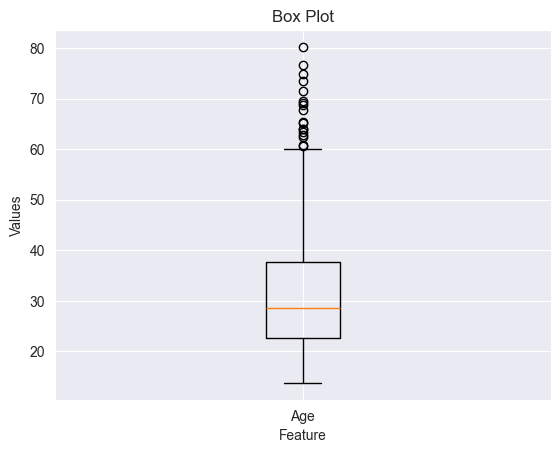

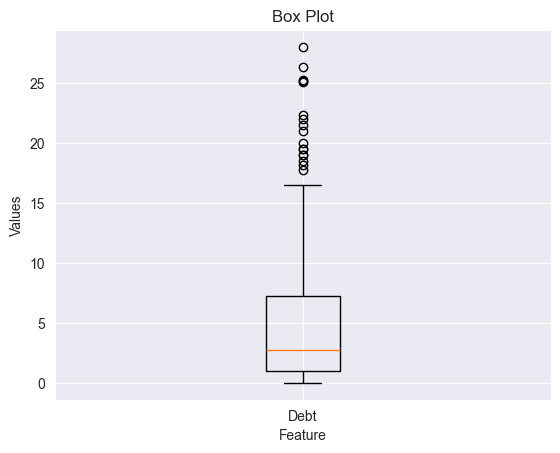

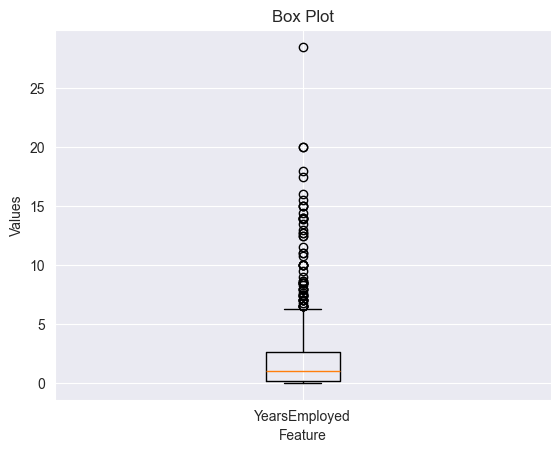

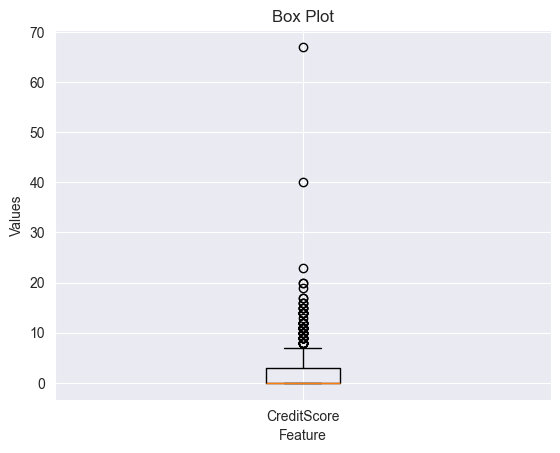

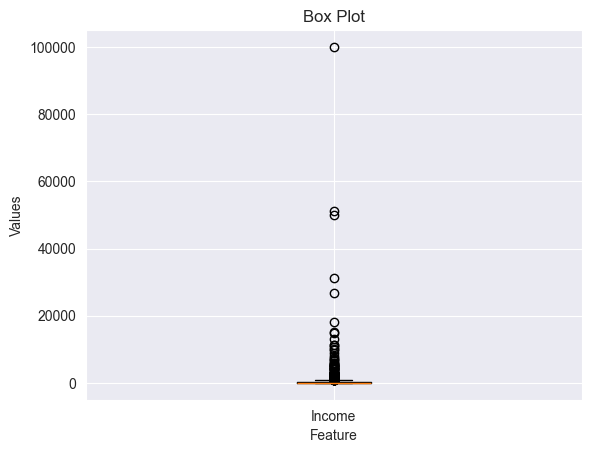

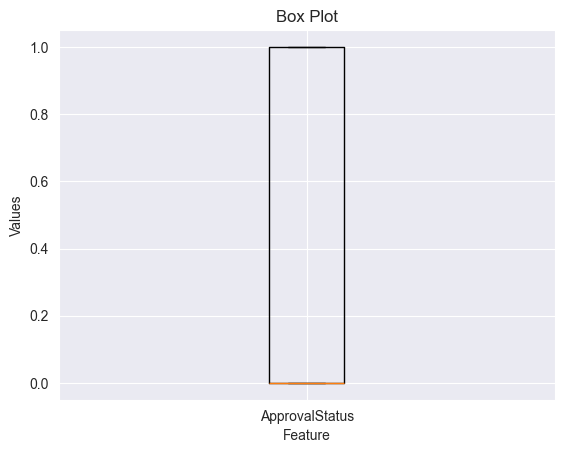

In [14]:
# Visualize a boxplot for the 6 attributes 
fig, ax = plt.subplots()
ax.boxplot(df.loc[:,"Age"])

ax.set_xticklabels(["Age"])
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax.set_title('Box Plot')


fig, ax = plt.subplots()
ax.boxplot(df.loc[:,"Debt"])

ax.set_xticklabels(["Debt"])
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax.set_title('Box Plot')


fig, ax = plt.subplots()
ax.boxplot(df.loc[:,"YearsEmployed"])

ax.set_xticklabels(["YearsEmployed"])
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax.set_title('Box Plot')


fig, ax = plt.subplots()
ax.boxplot(df.loc[:,"CreditScore"])

ax.set_xticklabels(["CreditScore"])
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax.set_title('Box Plot')


fig, ax = plt.subplots()
ax.boxplot(df.loc[:,"Income"])

ax.set_xticklabels(["Income"])
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax.set_title('Box Plot')


fig, ax = plt.subplots()
ax.boxplot(df.loc[:,"ApprovalStatus"])

ax.set_xticklabels(["ApprovalStatus"])
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax.set_title('Box Plot')
# ------------------

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Debt'),
  Text(2.5, 0, 'YearsEmployed'),
  Text(3.5, 0, 'CreditScore'),
  Text(4.5, 0, 'Income'),
  Text(5.5, 0, 'ApprovalStatus')])

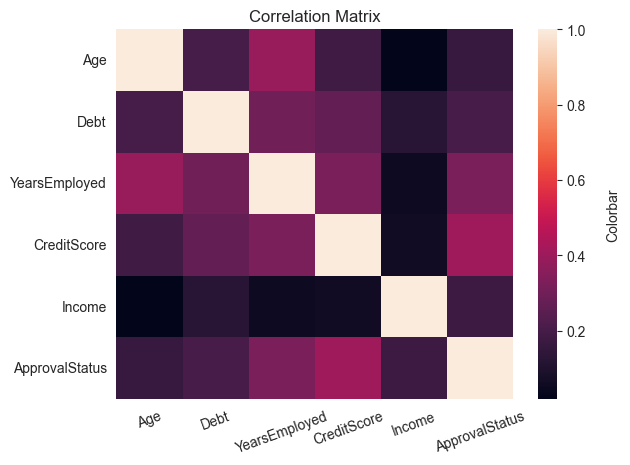

In [15]:
# Plot the correlation heatmap
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.gcf().axes[-1].set_ylabel('Colorbar', labelpad=15)
plt.xticks(rotation=20)

(array([133.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([-0.19527168,  0.78551514,  1.76630197,  2.7470888 ,  3.72787563,
         4.70866246,  5.68944928,  6.67023611,  7.65102294,  8.63180977,
         9.61259659]),
 <BarContainer object of 10 artists>)

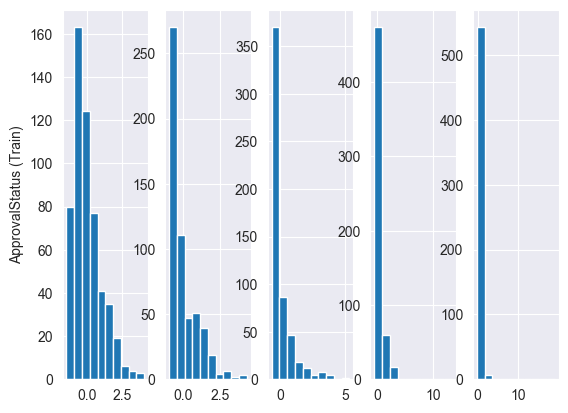

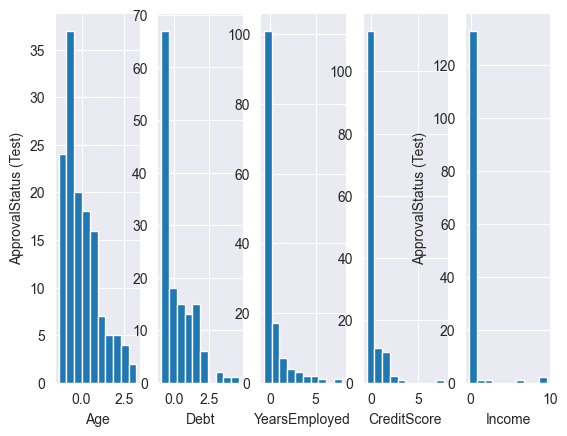

In [16]:
# Compare the distributions of the attributes in training and testing sets
fig, ax = plt.subplots(1, 5)

ax[0].set(ylabel = "ApprovalStatus (Train)")

ax[0].hist(x_train[:,0])
ax[1].hist(x_train[:,1])
ax[2].hist(x_train[:,2])
ax[3].hist(x_train[:,3])
ax[4].hist(x_train[:,4])

fig2, ax2 = plt.subplots(1,5)
plt.ylabel("ApprovalStatus (Test)")

ax2[0].set(xlabel = "Age", ylabel = "ApprovalStatus (Test)")
ax2[0].hist(x_test[:,0])

ax2[1].set(xlabel = "Debt")
ax2[1].hist(x_test[:,1])
          
ax2[2].set(xlabel = "YearsEmployed")
ax2[2].hist(x_test[:,2])

ax2[3].set(xlabel = "CreditScore")
ax2[3].hist(x_test[:,3])
          
ax2[4].set(xlabel = "Income")
ax2[4].hist(x_test[:,4])
#  -------------------

In [17]:
# Train a logistic regression model to predict the approval status
x_columns = ["Age", "Debt", "YearsEmployed", "CreditScore", "Income"]
y_columns = ["ApprovalStatus"]

model = LogisticRegression()
results = model.fit(x_train,y_train)

x_columns = ['intercept'] + x_columns
betahat = np.append(np.array(results.intercept_),results.coef_)
print("feature names:")
print(x_columns)
print("estimated coefficient")
print(betahat)

feature names:
['intercept', 'Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
estimated coefficient
[0.13728832 0.10073308 0.16666071 0.68761614 1.48475682 2.11049   ]


Analysis:

All the features positively affect the the approval status, with Income having the largest effect after Standardizaation.

Relative importance: Income > CreditScore > YearsEmployed > Debt > Age

The result is not reasonable, as higher debt usually implies higher chance of failure to repay the loan, and debt should be negatively correlated to the approval status.

In [18]:
# Compute the accuracy, precision, recall, and F-score of the model on the training and testing sets
y_train_pred = model.predict(x_train)
accuracy_train = precision_recall_fscore_support(y_train, y_train_pred)
print("Precision(0) and Precision(1) on training set: ", accuracy_train[0])
print("Recall(0) and Recall(1) on training set: ", accuracy_train[1])
print("F_score(0) and F_score(1) on training set: ", accuracy_train[2], "\n")

y_test_pred = model.predict(x_test)
accuracy_test = precision_recall_fscore_support(y_test, y_test_pred)
print("Precision(0) and Precision(1) on testing set: ", accuracy_test[0])
print("Recall(0) and Recall(1) on testing set: ", accuracy_test[1])
print("F_score(0) and F_score(1) on testing set: ", accuracy_test[2])

Precision(0) and Precision(1) on training set:  [0.7460733  0.82352941]
Recall(0) and Recall(1) on training set:  [0.9047619 0.5907173]
F_score(0) and F_score(1) on training set:  [0.81779053 0.68796069] 

Precision(0) and Precision(1) on testing set:  [0.65555556 0.8125    ]
Recall(0) and Recall(1) on testing set:  [0.86764706 0.55714286]
F_score(0) and F_score(1) on testing set:  [0.74683544 0.66101695]


/Users/ahbo/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[Text(0.5, 1.0, 'Testing sets')]

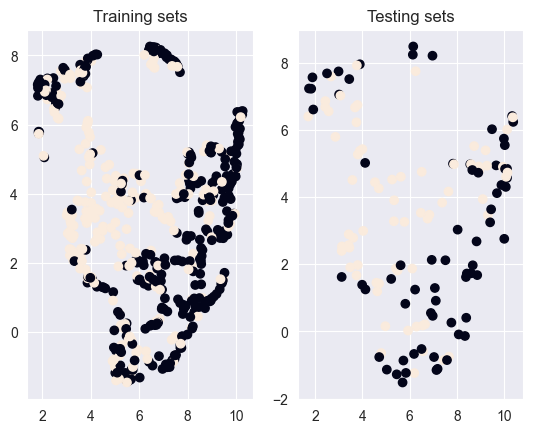

In [19]:

reducer = umap.UMAP(random_state=42)
x_train_reduced = reducer.fit_transform(x_train)
x_test_reduced = reducer.transform(x_test)


fig, ax = plt.subplots(1, 2)

ax[0].scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train)
ax[0].set(title = "Training sets")


ax[1].scatter(x_test_reduced[:,0], x_test_reduced[:,1], c=y_test)
ax[1].set(title="Testing sets")